In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Binning

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
top = Table.read_table('../data/top_movies.csv')
top

Title                                     | Studio               | Gross     | Gross (Adjusted) | Year
Star Wars: The Force Awakens              | Buena Vista (Disney) | 906723418 | 906723400        | 2015
Avatar                                    | Fox                  | 760507625 | 846120800        | 2009
Titanic                                   | Paramount            | 658672302 | 1178627900       | 1997
Jurassic World                            | Universal            | 652270625 | 687728000        | 2015
Marvel's The Avengers                     | Buena Vista (Disney) | 623357910 | 668866600        | 2012
The Dark Knight                           | Warner Bros.         | 534858444 | 647761600        | 2008
Star Wars: Episode I - The Phantom Menace | Fox                  | 474544677 | 785715000        | 1999
Star Wars                                 | Fox                  | 460998007 | 1549640500       | 1977
Avengers: Age of Ultron                   | Buena Vista (Disney) | 459005868 | 465684200        | 2015
The Dark Knight Rises                     | Warner Bros.         | 448139099 | 500961700        | 2012
... (190 rows omitted)

In [3]:
age = 2017 - top.column('Year')

In [4]:
top = top.with_column('Age', age)

In [5]:
top

Title                                     | Studio               | Gross     | Gross (Adjusted) | Year | Age
Star Wars: The Force Awakens              | Buena Vista (Disney) | 906723418 | 906723400        | 2015 | 2
Avatar                                    | Fox                  | 760507625 | 846120800        | 2009 | 8
Titanic                                   | Paramount            | 658672302 | 1178627900       | 1997 | 20
Jurassic World                            | Universal            | 652270625 | 687728000        | 2015 | 2
Marvel's The Avengers                     | Buena Vista (Disney) | 623357910 | 668866600        | 2012 | 5
The Dark Knight                           | Warner Bros.         | 534858444 | 647761600        | 2008 | 9
Star Wars: Episode I - The Phantom Menace | Fox                  | 474544677 | 785715000        | 1999 | 18
Star Wars                                 | Fox                  | 460998007 | 1549640500       | 1977 | 40
Avengers: Age of Ultron                   | Buena Vista (Disney) | 459005868 | 465684200        | 2015 | 2
The Dark Knight Rises                     | Warner Bros.         | 448139099 | 500961700        | 2012 | 5
... (190 rows omitted)

In [6]:
min(top.column('Age')), max(top.column('Age'))

(2, 96)

In [7]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [8]:
top.bin('Age', bins = my_bins)

bin  | Age count
0    | 13
5    | 20
10   | 22
15   | 38
25   | 42
40   | 53
65   | 12
100  | 0

In [9]:
# same as above
top.bin('Age', bins = [0, 5, 10, 15, 25, 40, 65, 100])

bin  | Age count
0    | 13
5    | 20
10   | 22
15   | 38
25   | 42
40   | 53
65   | 12
100  | 0

In [10]:
sum(top.bin('Age', bins = my_bins).column(1))

200

In [11]:
top.bin('Age', bins = np.arange(0, 101, 25))

bin  | Age count
0    | 93
25   | 68
50   | 32
75   | 7
100  | 0

In [12]:
# why using nunmpy where plain python is enough?
top.bin('Age', bins = range(0, 101, 25))

bin  | Age count
0    | 93
25   | 68
50   | 32
75   | 7
100  | 0

In [13]:
top.bin('Age', bins = np.arange(0, 60, 25))

bin  | Age count
0    | 93
25   | 71
50   | 0

In [14]:
# why using nunmpy where plain python is enough?
top.bin('Age', bins = range(0, 60, 25))

bin  | Age count
0    | 93
25   | 71
50   | 0

In [15]:
top.where('Age', 50)

Title                        | Studio   | Gross     | Gross (Adjusted) | Year | Age
The Jungle Book              | Disney   | 141843612 | 641015300        | 1967 | 50
The Graduate                 | AVCO     | 104945305 | 744517700        | 1967 | 50
Guess Who's Coming to Dinner | Columbia | 56666667  | 376335900        | 1967 | 50

## Drawing Histograms

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [16]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [17]:
top.bin('Age', bins = my_bins)

bin  | Age count
0    | 13
5    | 20
10   | 22
15   | 38
25   | 42
40   | 53
65   | 12
100  | 0

D:\dev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


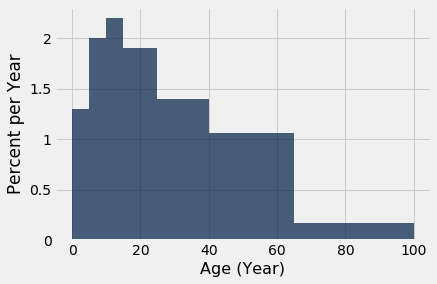

In [18]:
# normed (used behind the curtains, set to True by default) is deprecated
top.hist('Age', bins = my_bins, unit = 'Year')

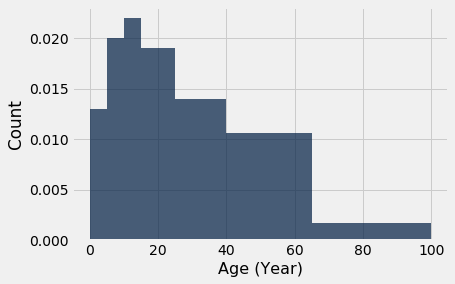

In [19]:
# using density instead of normed
top.hist('Age', bins = my_bins, unit = 'Year', normed = None, density = True)

D:\dev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


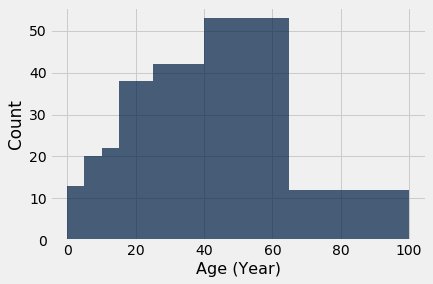

In [20]:
# normed is deprecated, besides the result violates the area principle
top.hist('Age', bins = my_bins, unit = 'Year', normed = False)

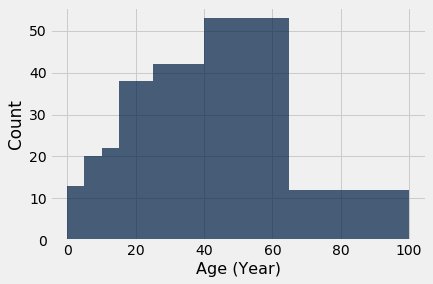

In [21]:
# not using normed, density is False by default, still the result violates the area principle
top.hist('Age', bins = my_bins, unit = 'Year', normed = None)

D:\dev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


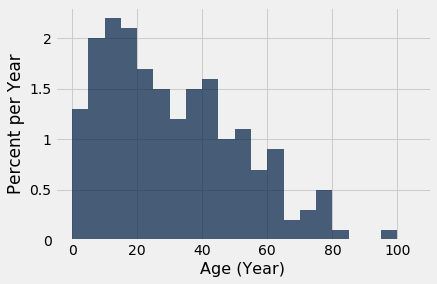

In [22]:
# first attemp in lesson, the datascience library uses the deprecated normed attribute behind the scene
top.hist('Age', bins = np.arange(0, 110, 5), unit = 'Year')

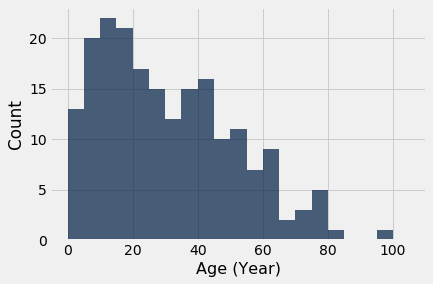

In [23]:
# get rid of the deprecated normed.
top.hist('Age', bins = np.arange(0, 110, 5), unit = 'Year', normed = None)

D:\dev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


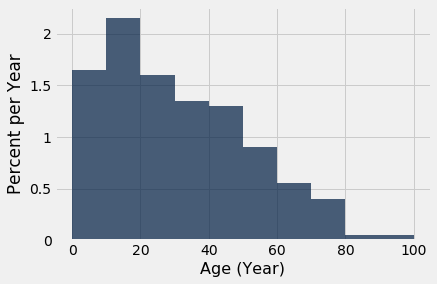

In [24]:
# wider bins, less details, more readable
top.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

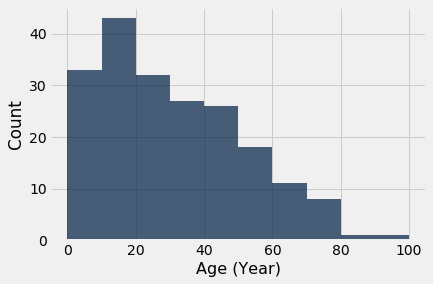

In [25]:
# get rid of normed
top.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year', normed = None)

## Density

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [26]:
top.bin('Age', bins = my_bins)

bin  | Age count
0    | 13
5    | 20
10   | 22
15   | 38
25   | 42
40   | 53
65   | 12
100  | 0

D:\dev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


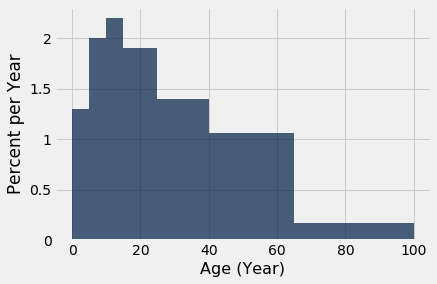

In [27]:
top.hist('Age', bins = my_bins, unit = 'Year')

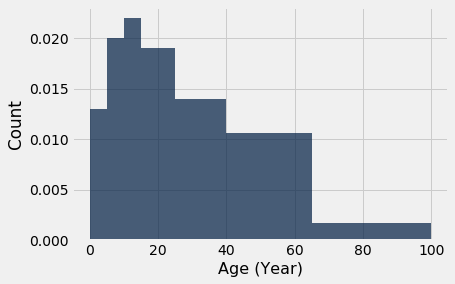

In [28]:
# get rid of deprecated normed
top.hist('Age', bins = my_bins, unit = 'Year', normed = None, density = True)

In [29]:
# block [25, 40)
area = 42 / 200
width = 40 - 25
height = area / width  # 0.21 / 15
print('area is {}, width is {}, height is {}'.format(area, width, height))

area is 0.21, width is 15, height is 0.014


In [30]:
# block [10, 15)
area = 22 / 200
width = 15 - 10
height = area / width  # 0.11 / 5
print('area is {}, width is {}, height is {}'.format(area, width, height))

area is 0.11, width is 5, height is 0.022


## Example 2: Income

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [31]:
incomes = Table.read_table('../data/incomes.csv')
incomes

Name               | 2016 Income
Jennifer Lawrence  | 61.7
Scarlett Johansson | 57.5
Angelina Jolie     | 40
Jennifer Aniston   | 24.75
Anne Hathaway      | 24
Melissa McCarthy   | 24
Bingbing Fan       | 20
Sandra Bullock     | 20
Cara Delevingne    | 15
Reese Witherspoon  | 15
... (10 rows omitted)

In [32]:
incomes.bin(1, bins = [0, 15, 25, 85])

bin  | 2016 Income count
0    | 9
15   | 8
25   | 3
85   | 0

D:\dev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


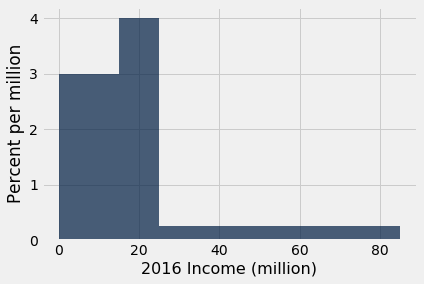

In [33]:
incomes.hist(1, bins = [0, 15, 25, 85], unit = 'million')

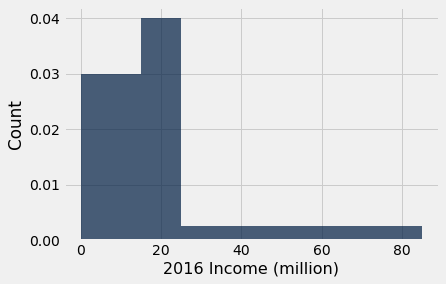

In [34]:
incomes.hist(1, bins = [0, 15, 25, 85], unit = 'million', normed = None, density = True)

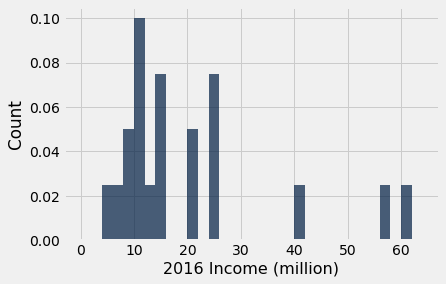

In [35]:
incomes.hist(1, bins = range(0,65,2), unit = 'million', normed = None, density = True)